# 1) Data Understanding

**Columns**
* **Age**: age of the patient [years]
* **Sex**: sex of the patient [M: Male, F: Female]
* **ChestPainType**: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
* **RestingBP**: resting blood pressure [mm Hg]
* **Cholesterol**: serum cholesterol [mm/dl]
* **FastingBS**: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
* **RestingECG**: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
* **MaxHR**: maximum heart rate achieved [Numeric value between 60 and 202]
* **ExerciseAngina**: exercise-induced angina [Y: Yes, N: No]
* **Oldpeak**: oldpeak = ST [Numeric value measured in depression]
* **ST_Slope**: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
* **HeartDisease**: output class [1: heart disease, 0: Normal]

# Summary About the dataset

Context
Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Four out of 5CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. Heart failure is a common event caused by CVDs and this dataset contains 11 features that can be used to predict a possible heart disease.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.

Attribute Information
Age: age of the patient [years] -Sex: sex of the patient [M: Male, F: Female] -ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic] -RestingBP: resting blood pressure [mm Hg] -Cholesterol: serum cholesterol [mm/dl] -FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise] -RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST --- elevation or depression of > 0.05 mV),
LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria] -MaxHR: maximum heart rate achieved [Numeric value between 60 and 202] -ExerciseAngina: exercise-induced angina [Y: Yes, N: No] -Oldpeak: oldpeak = ST [Numeric value measured in depression] -ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping] -HeartDisease: output class [1: heart disease, 0: Normal]


**Target**
Building ML models to classify new patients if they have heart disease or not

We Will Use This Models ..
* KNN
* SVM
* Random Forest
* Decision Tree

**Importing Packages**

In [1]:
# Handling Data
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Machine Learning
from sklearn.preprocessing import StandardScaler # Scaling
from sklearn.preprocessing import OrdinalEncoder # Convert Categorical Data
from sklearn.model_selection import train_test_split # Train Test Split

# Metrics
from sklearn.metrics import accuracy_score # Scoring Models Accuracy
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

# Models
from sklearn.neighbors import KNeighborsClassifier as KNN # K-Nearest Neighbors
from sklearn.svm import SVC                               # Support Vector Classifier
from sklearn.ensemble import RandomForestClassifier as RF # Random Forest Classifier
from sklearn.tree import DecisionTreeClassifier as DT     # Decision Tree Classifier

**Importing Data**

In [2]:
path = 'C:/Users/Ajay/Downloads/heart.csv'
df = pd.read_csv(path)

df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


**Data shape**

In [3]:
print(f'{df.shape[0]} Rows, {df.shape[1]} Columns')

918 Rows, 12 Columns


**Data Information & Checking Null Values**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


**Data types of columns**

In [5]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

# 2) **Data Preparation**

**Missing Values**

In [6]:
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

**Duplicate data**

In [7]:
f"Number of Duplicated Rows {df.duplicated().sum()}"

'Number of Duplicated Rows 0'

**Correlation between features and heart disease**

correlation or dependence is any statistical relationship, whether causal or not, between two random variables

Its necessary to remove correlated variables to improve your model.

In [8]:
df_corr = df.corr()
df_corr[["HeartDisease"]].sort_values(by=["HeartDisease"])

,HeartDisease
MaxHR,-0.400421
Cholesterol,-0.232741
RestingBP,0.107589
FastingBS,0.267291
Age,0.282039
Oldpeak,0.403951
HeartDisease,1.000000


**All features are important to our models..**

**Separate Data**

In [9]:
num_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()[:-1] # Removing [HeartDisease]
cate_cols = df.select_dtypes(include=['object']).columns.tolist()
target = ['HeartDisease']
num_cols, cate_cols, target

(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak'],
 ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'],
 ['HeartDisease'])

# 2.1) **Data Visualization**

* Univariate analysis focuses on analyzing each feature in the dataset independently.
* Distribution analysis:
The distribution of each feature is examined to identify its shape, central tendency, and dispersion.
* Identifying potential issues:
Univariate analysis helps in identifying potential problems with the data such as outliers, skewness, and missing values

# Segregating Columns into groups
* Numerical -> Age, RestingBP, Cholesterol, MaxHR, OldPeak
* Categorical -> Sex, ChestPainType, RestingECG, ExerciseAngina, ST_Slope, HeartDisease,FastingBS

# Analysis on Age

In [10]:
df['Age'].describe()

count    918.000000
mean      53.510893
std        9.432617
min       28.000000
25%       47.000000
50%       54.000000
75%       60.000000
max       77.000000
Name: Age, dtype: float64

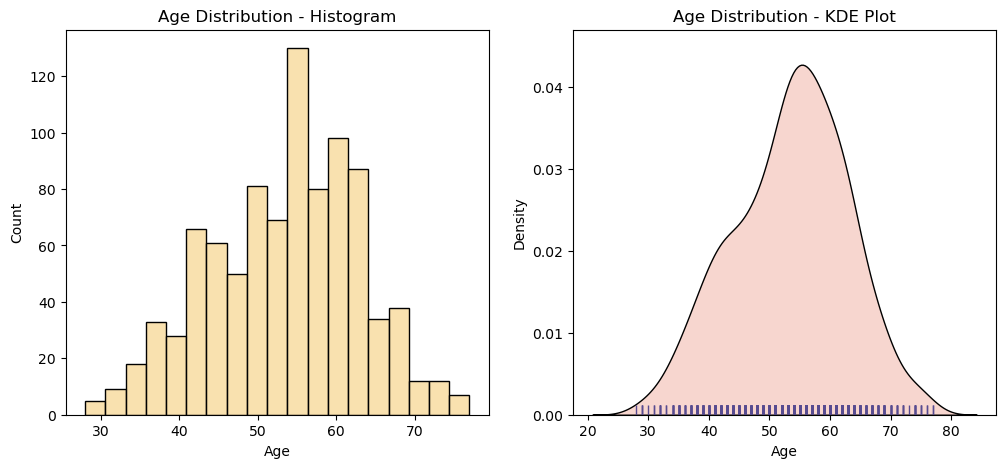

In [11]:
fig, ax = plt.subplots(1,2, figsize=(12,5))

ax[0] = sns.histplot(data=df, x='Age', linewidth=1, edgecolor='black', ax=ax[0], color='#f7d794')
ax[0].set(title='Age Distribution - Histogram')

ax[1] = sns.kdeplot(data=df, x='Age', fill=True, edgecolor='black', ax=ax[1], color='#e15f41')
ax[1] = sns.rugplot(data=df, x='Age', ax=ax[1], color='#574b90')
ax[1].set(title='Age Distribution - KDE Plot')

plt.show()

In [12]:
df['Age'].skew()

-0.19593302867569365

### Checking for outliers

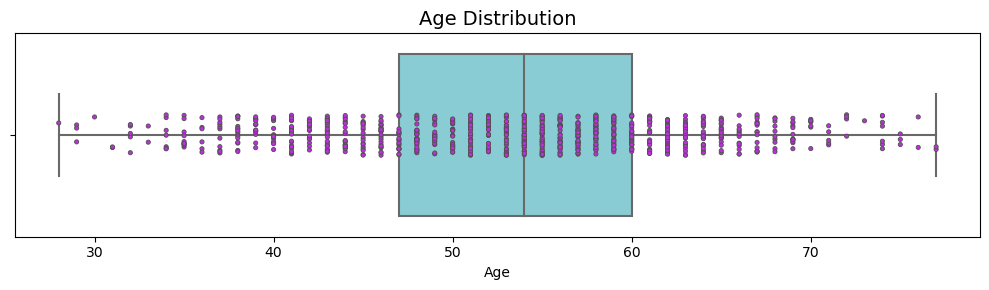

In [14]:
fig, ax = plt.subplots(figsize=(10, 3))
sns.boxplot(data=df, x='Age', color='#7ed6df')
sns.stripplot(data=df, x='Age', linewidth = 0.6, size=3, color='#be2edd')
plt.title('Age Distribution',fontsize= 14)
plt.tight_layout()
plt.show()

 Conclusions:
1. No missing values
2. Data is almost normal
3. No outliers

# Analysis on RestingBP

In [18]:
df['RestingBP'].describe()

count    918.000000
mean     132.396514
std       18.514154
min        0.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: RestingBP, dtype: float64

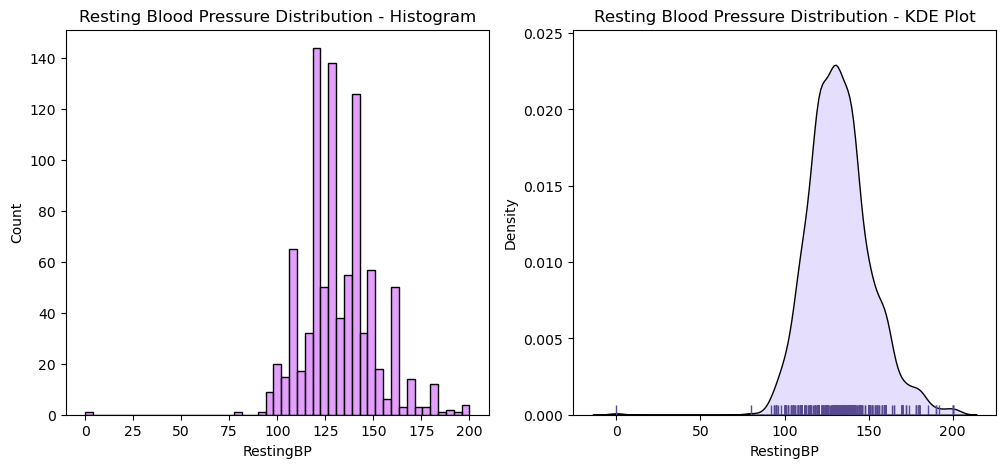

In [19]:
fig, ax = plt.subplots(1,2, figsize=(12,5))

ax[0] = sns.histplot(data=df, x='RestingBP', linewidth=1, edgecolor='black', ax=ax[0], color='#D980FA')
ax[0].set(title='Resting Blood Pressure Distribution - Histogram')

ax[1] = sns.kdeplot(data=df, x='RestingBP', fill=True, edgecolor='black', ax=ax[1], color='#9980FA')
ax[1] = sns.rugplot(data=df, x='RestingBP', ax=ax[1], color='#574b90')
ax[1].set(title='Resting Blood Pressure Distribution - KDE Plot')

plt.show()

In [20]:
df['RestingBP'].skew()

0.1798393100516288

### Checking For Outliers

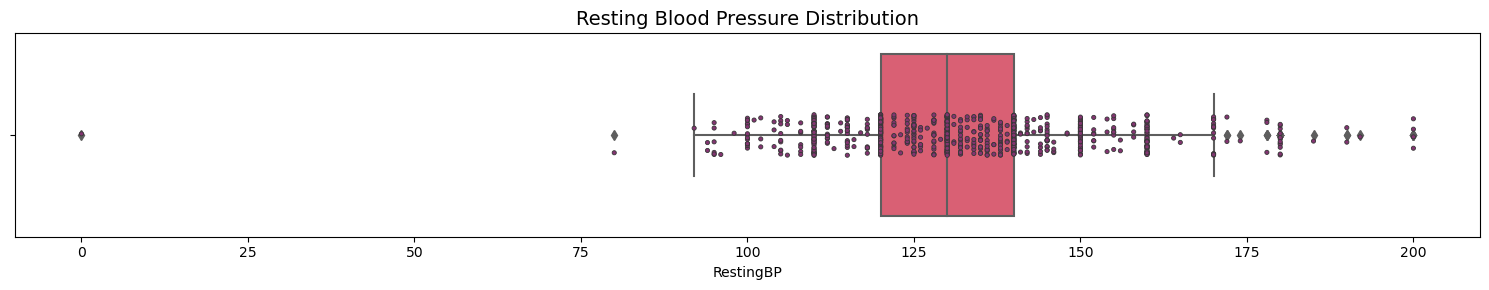

In [21]:
fig, ax = plt.subplots(figsize=(15, 3))
sns.boxplot(data=df, x='RestingBP', color='#ED4C67')
sns.stripplot(data=df, x='RestingBP', linewidth = 0.6, size=3, color='#833471')
plt.title('Resting Blood Pressure Distribution',fontsize= 14)
plt.tight_layout()
plt.show()

 Conclusions:
    
- No missing values
- Almost normal distribution
- There are some outliers 
    

# Analysis on Cholesterol

In [23]:
df['Cholesterol'].describe()

count    918.000000
mean     198.799564
std      109.384145
min        0.000000
25%      173.250000
50%      223.000000
75%      267.000000
max      603.000000
Name: Cholesterol, dtype: float64

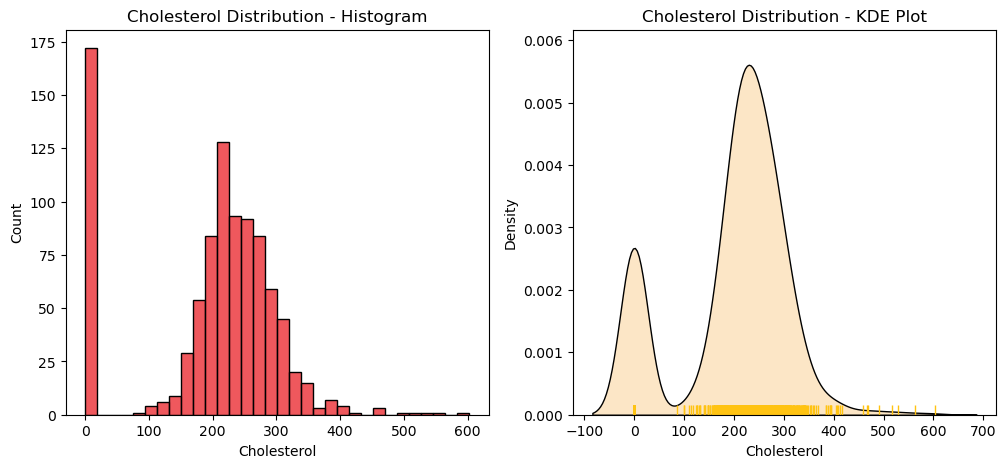

In [24]:
fig, ax = plt.subplots(1,2, figsize=(12,5))

ax[0] = sns.histplot(data=df, x='Cholesterol', linewidth=1, edgecolor='black', ax=ax[0], color='#EA2027')
ax[0].set(title='Cholesterol Distribution - Histogram')

ax[1] = sns.kdeplot(data=df, x='Cholesterol', fill=True, edgecolor='black', ax=ax[1], color='#F79F1F')
ax[1] = sns.rugplot(data=df, x='Cholesterol', ax=ax[1], color='#FFC312')
ax[1].set(title='Cholesterol Distribution - KDE Plot')

plt.show()

In [25]:
df['Cholesterol'].skew()

-0.6100864307268192

### Checking for outliers

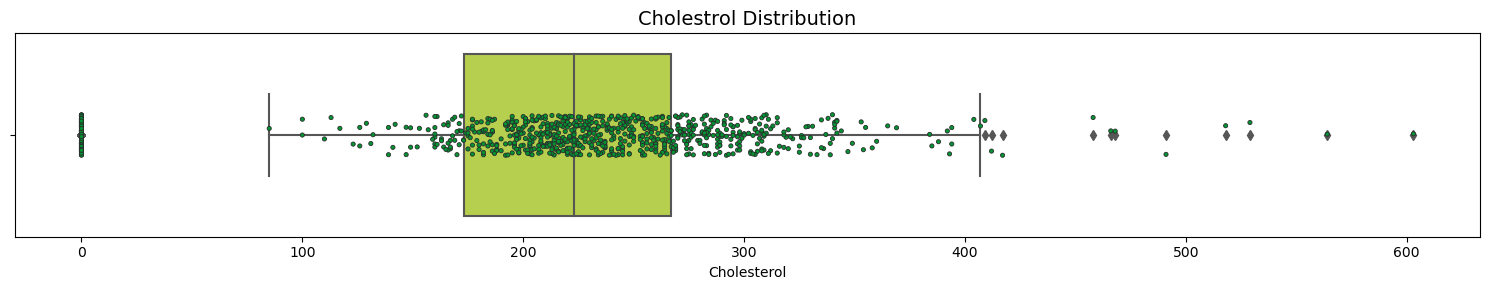

In [26]:
fig, ax = plt.subplots(figsize=(15, 3))
sns.boxplot(data=df, x='Cholesterol', color='#C4E538')
sns.stripplot(data=df, x='Cholesterol', linewidth = 0.6, size=3, color='#009432')
plt.title('Cholestrol Distribution',fontsize= 14)
plt.tight_layout()
plt.show()

## Exploring the outliers

In [27]:
df[(df['Cholesterol'] == 0) & df['HeartDisease'] == 1]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
293,65,M,ASY,115,0,0,Normal,93,Y,0.0,Flat,1
294,32,M,TA,95,0,1,Normal,127,N,0.7,Up,1
295,61,M,ASY,105,0,1,Normal,110,Y,1.5,Up,1
296,50,M,ASY,145,0,1,Normal,139,Y,0.7,Flat,1
297,57,M,ASY,110,0,1,ST,131,Y,1.4,Up,1
...,...,...,...,...,...,...,...,...,...,...,...,...
508,67,M,ASY,120,0,1,Normal,150,N,1.5,Down,1
514,43,M,ASY,122,0,0,Normal,120,N,0.5,Up,1
518,48,M,NAP,102,0,1,ST,110,Y,1.0,Down,1
535,56,M,ASY,130,0,0,LVH,122,Y,1.0,Flat,1


In [28]:
df[(df['Cholesterol'] > 450)]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
28,53,F,ATA,113,468,0,Normal,127,N,0.0,Up,0
30,53,M,NAP,145,518,0,Normal,130,N,0.0,Flat,1
76,32,M,ASY,118,529,0,Normal,130,N,0.0,Flat,1
103,40,M,ASY,120,466,1,Normal,152,Y,1.0,Flat,1
149,54,M,ASY,130,603,1,Normal,125,Y,1.0,Flat,1
250,44,M,ASY,135,491,0,Normal,135,N,0.0,Flat,1
496,58,M,ASY,132,458,1,Normal,69,N,1.0,Down,0
616,67,F,NAP,115,564,0,LVH,160,N,1.6,Flat,0


 Conclusions:
* No missing values
* This follows a Bimodal distribution
* According to the articles I read online, Serum cholesterol levels of zero are highly unlikely in a physiological context. And often high cholesterol is related to risk of heart disease. But in our data, we can see that even people having 0 cholesterol (with other normal parameters) are prone to heart disease. So this seems like an error in value entering to me
*On the other side of the spectrum, values above 400, are high but they are not outliers cause the range goes as high as 800. And these people also have a risk of heart disease with high cholesterol. So, this seems kind of legit

# Analysis on Max Heart Rate

In [29]:
df['MaxHR'].describe()

count    918.000000
mean     136.809368
std       25.460334
min       60.000000
25%      120.000000
50%      138.000000
75%      156.000000
max      202.000000
Name: MaxHR, dtype: float64

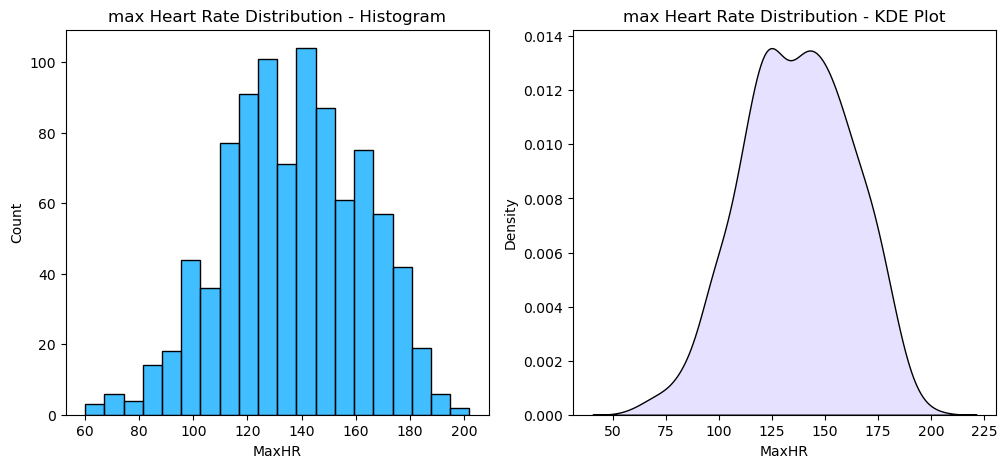

In [30]:
fig, ax = plt.subplots(1,2, figsize=(12,5))

ax[0] = sns.histplot(data=df, x='MaxHR', linewidth=1, edgecolor='black', ax=ax[0], color='#00a8ff')
ax[0].set(title='max Heart Rate Distribution - Histogram')

ax[1] = sns.kdeplot(data=df, x='MaxHR', fill=True, edgecolor='black', ax=ax[1], color='#9c88ff')
# ax[1] = sns.rugplot(data=df, x='MaxHR', ax=ax[1], color='#487eb0')
ax[1].set(title='max Heart Rate Distribution - KDE Plot')

plt.show()

In [31]:
df['MaxHR'].skew()

-0.14435941846180994

### Checking For Outliers

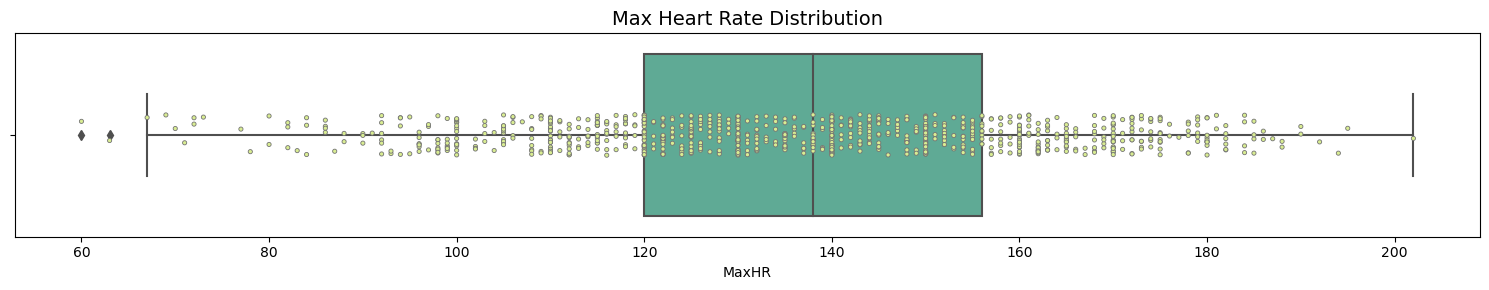

In [32]:
fig, ax = plt.subplots(figsize=(15, 3))
sns.boxplot(data=df, x='MaxHR', color='#52b69a')
sns.stripplot(data=df, x='MaxHR', linewidth = 0.6, size=3, color='#d9ed92')
plt.title('Max Heart Rate Distribution',fontsize= 14)
plt.tight_layout()
plt.show()

### Exploring the outliers

In [33]:
df.query("MaxHR < 70")

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
370,60,M,ASY,135,0,0,Normal,63,Y,0.5,Up,1
390,51,M,ASY,140,0,0,Normal,60,N,0.0,Flat,1
402,65,M,ASY,145,0,1,ST,67,N,0.7,Flat,1
496,58,M,ASY,132,458,1,Normal,69,N,1.0,Down,0


Conclusions:
* No null values
* Almost normally distributed
* There are handful of outliers
* Most people have a max heart rate of 150, which seems okay as most of the people in this dataset are aged between 50 - 65

# Univariate Analysis on Categorical Variables

## Analysis on Heart Disease

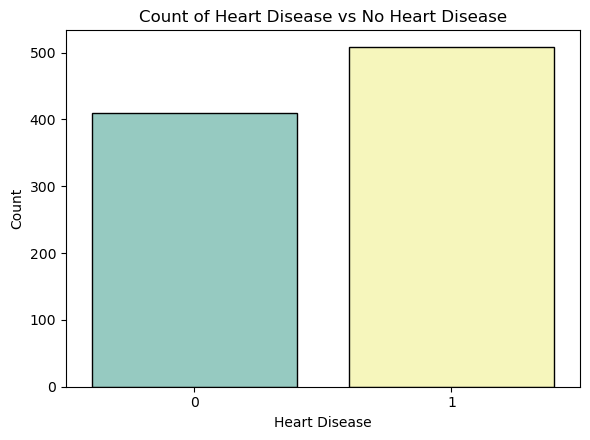

In [36]:
fig, ax = plt.subplots(figsize=(6, 4.5))
ax = sns.barplot(data=df['HeartDisease'].value_counts().reset_index(), x='index', y='HeartDisease', 
           linewidth=1, edgecolor='black', palette='Set3', ax=ax)
ax.set(title='Count of Heart Disease vs No Heart Disease', ylabel='Count', xlabel='Heart Disease')
plt.tight_layout()
plt.show()

 Conclusions:
* We have more patients with risk of heart disease in this dataset

## Analysis on Sex

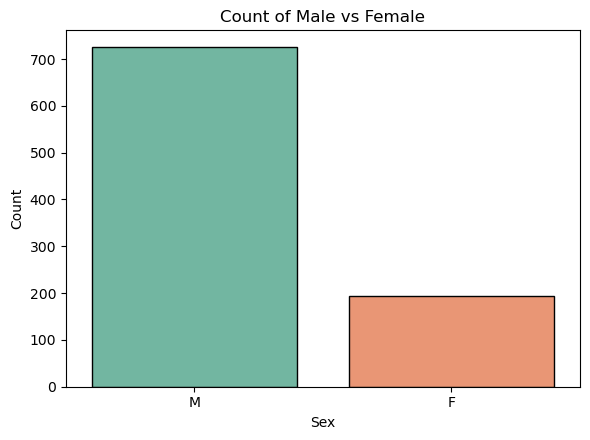

In [37]:
fig, ax = plt.subplots(figsize=(6, 4.5))
ax = sns.barplot(data=df['Sex'].value_counts().reset_index(), x='index', y='Sex', 
           linewidth=1, edgecolor='black', palette='Set2', ax=ax)
ax.set(title='Count of Male vs Female', ylabel='Count', xlabel='Sex')
plt.tight_layout()
plt.show()

🔍 Conclusions:
* The dataset predominantly consists of records from males, outnumbering records from females.
* The male records significantly outnumber the female records in this dataset, with a ratio of more than three to one.
* It is important to be mindful of this gender imbalance in our dataset to avoid introducing bias when making assumptions or drawing conclusions.

# Analysis on Chest Pain Type

#### Abbreviations for Chest Pain Explanation
ASY : ASY stands for "Asymptomatic" chest pain. It indicates that the individuals in the dataset did not experience any noticeable chest pain symptoms. They may have been included in the dataset for other reasons, such as a medical examination or routine check-up.

NAP : NAP stands for "Non-Anginal Pain" chest pain. Non-anginal pain refers to chest discomfort or pain that is not related to a reduced blood supply to the heart. It is typically not caused by underlying heart disease but may still be a cause of concern and require further evaluation.

ATA : ATA stands for "Atypical Angina" chest pain. Atypical angina refers to chest pain that does not fit the typical pattern of symptoms associated with angina. It may have different characteristics or be triggered by factors other than physical exertion or emotional stress.

TA : TA stands for "Typical Angina" chest pain. Typical angina refers to chest pain that follows a predictable pattern and is commonly associated with coronary artery disease. It is typically described as a squeezing or pressure-like sensation in the chest that is brought on by physical exertion or emotional stress and is relieved with rest or nitroglycerin medication

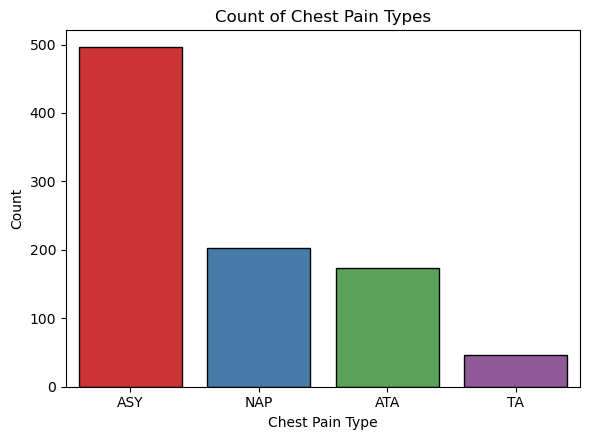

In [38]:
fig, ax = plt.subplots(figsize=(6, 4.5))
ax = sns.barplot(data=df['ChestPainType'].value_counts().reset_index(), x='index', y='ChestPainType', 
           linewidth=1, edgecolor='black', palette='Set1', ax=ax)
ax.set(title='Count of Chest Pain Types', ylabel='Count', xlabel='Chest Pain Type')
plt.tight_layout()
plt.show()

🔍 Conclusions:
* The majority of individuals in the dataset did not report any noticeable symptoms of chest pain.
* This suggests that noticeable chest pain may not be the primary symptom associated with heart disease.* 
* We can be sure of this when we do the bivarite analysis of Chest Pain Type and the Heart Disease Column

# Bivariate Analysis

Bivariate analysis is the examination of the relationship between two variables. Here are three key points about bivariate analysis:

Relationship Exploration: Bivariate analysis helps uncover patterns, associations, or connections between two variables. It allows us to understand how changes in one variable correspond to changes in another variable.

Correlation Assessment: Bivariate analysis helps us assess the strength and direction of the relationship between two variables. It enables us to determine if the variables are positively, negatively, or not correlated at all.

Visual Representation: Bivariate analysis often involves the use of visualizations such as scatter plots, line graphs, or heatmaps. These visual representations provide a clear and concise way to understand the relationship between the two variable

# Analysis between Heart Disease and Age:
### Which age group is most prone to heart disease?

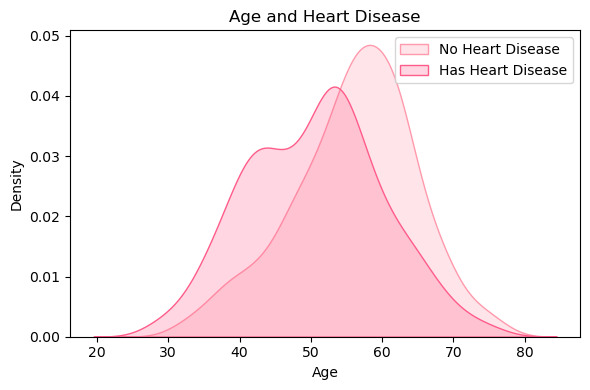

In [39]:
plt.figure(figsize=(6, 4))
sns.kdeplot(data = df[df['HeartDisease'] == 1], x='Age', fill=True,   color='#ff99ac', label='No Heart Disease')
sns.kdeplot(data = df[df['HeartDisease'] == 0], x='Age', fill=True,  color='#ff5c8a', label='Has Heart Disease')
plt.legend()
plt.title('Age and Heart Disease')
plt.tight_layout()
plt.show()

🔍 Conclusions:
* Individuals under the age of 50 have a lower likelihood of experiencing heart disease.
* Once individuals reach the age of 50, the risk of developing heart disease significantly increases.
* The age group between 55 and 60 shows the highest susceptibility to heart disease.
* Individuals above the age of 60 consistently have a higher chance of developing heart disease compared to not having it.

# Analysis between Heart Disease and Gender:
## Which gender is most prone to heart disease?

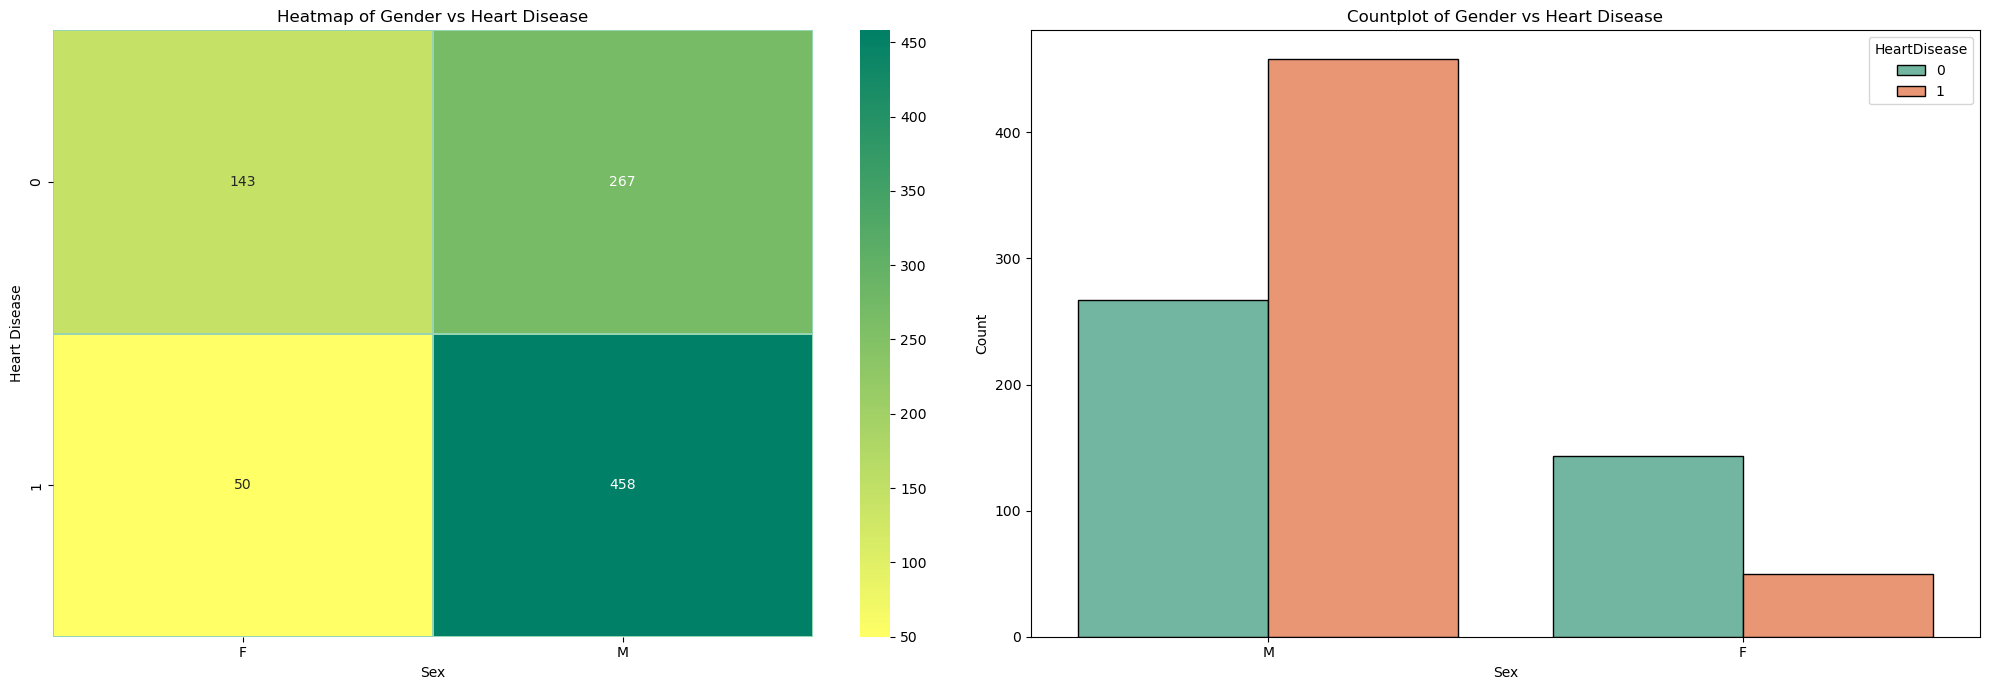

In [40]:
temp_df = pd.crosstab(df['HeartDisease'], df['Sex'])

fig, ax = plt.subplots(1,2, figsize=(20,7))

ax[0] = sns.heatmap(data=temp_df, annot=True, ax=ax[0],fmt='0g', linewidths=0.01, cmap='summer_r', linecolor='#95d5b2')
ax[0].set(title='Heatmap of Gender vs Heart Disease', ylabel='Heart Disease')

ax[1] = sns.countplot(data=df, x="Sex", hue="HeartDisease", palette = 'Set2', ax=ax[1], edgecolor='black')
ax[1].set(title='Countplot of Gender vs Heart Disease', ylabel='Count')

plt.tight_layout()
plt.show()

🔍 Conclusions:
* The occurrence of heart disease is more prevalent among males compared to females.
* It's important to note that our dataset contains significantly more data for males than females, almost three times as much.
* However, when considering the percentages, approximately 25% of females in the dataset have heart disease, while a higher percentage of around 63% of males have heart disease.
* These observations highlight the gender disparity in the prevalence of heart disease, with a higher proportion of males being affected.

# Analysis between Heart Disease and Cholesterol:
### Does Cholesterol play a role in heart disease?

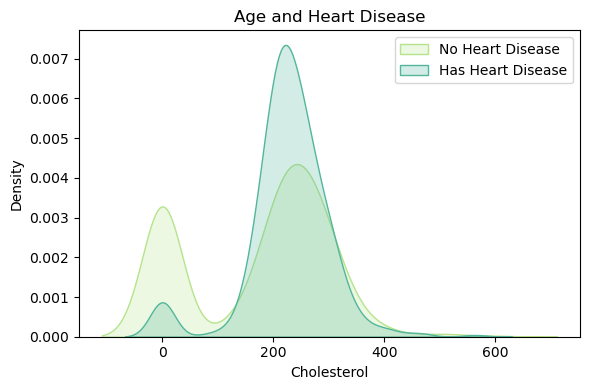

In [41]:
plt.figure(figsize=(6, 4))
sns.kdeplot(data = df[df['HeartDisease'] == 1], x='Cholesterol', fill=True,   color='#b5e48c', label='No Heart Disease')
sns.kdeplot(data = df[df['HeartDisease'] == 0], x='Cholesterol', fill=True,  color='#52b69a', label='Has Heart Disease')
plt.legend()
plt.title('Age and Heart Disease')
plt.tight_layout()
plt.show()

 Conclusions:
* Cholesterol Ranges
* Normal: less than 150 mg/dL.
* Mild hypertriglyceridemia: 150 to 499 mg/dL.
* Moderate hypertriglyceridemia: 500 to 886 mg/dL.
* Very high or severe hypertriglyceridemia: greater than 886 mg/dL.

* The analysis reveals that individuals with cholesterol levels below 150 mg/dL are generally considered healthy.
* While there are still a significant number of healthy individuals above this range, the number of individuals prone to heart disease is substantially higher.
* These findings suggest that higher cholesterol levels do indeed pose an increased risk of heart disease.
* These observations support the notion that elevated cholesterol levels contribute to a higher likelihood of developing heart disease.

# Analysis between Heart Disease and Chest Pain Type:
### What does Chest Pain Type tell us about Heart Disease?
#### 💡Reminder: Abbreviations for Chest Pain Explanation
ASY : ASY stands for "Asymptomatic" chest pain. It indicates that the individuals in the dataset did not experience any noticeable chest pain symptoms. They may have been included in the dataset for other reasons, such as a medical examination or routine check-up.

NAP : NAP stands for "Non-Anginal Pain" chest pain. Non-anginal pain refers to chest discomfort or pain that is not related to a reduced blood supply to the heart. It is typically not caused by underlying heart disease but may still be a cause of concern and require further evaluation.

ATA : ATA stands for "Atypical Angina" chest pain. Atypical angina refers to chest pain that does not fit the typical pattern of symptoms associated with angina. It may have different characteristics or be triggered by factors other than physical exertion or emotional stress.

TA : TA stands for "Typical Angina" chest pain. Typical angina refers to chest pain that follows a predictable pattern and is commonly associated with coronary artery disease. It is typically described as a squeezing or pressure-like sensation in the chest that is brought on by physical exertion or emotional stress and is relieved with rest or nitroglycerin medication.

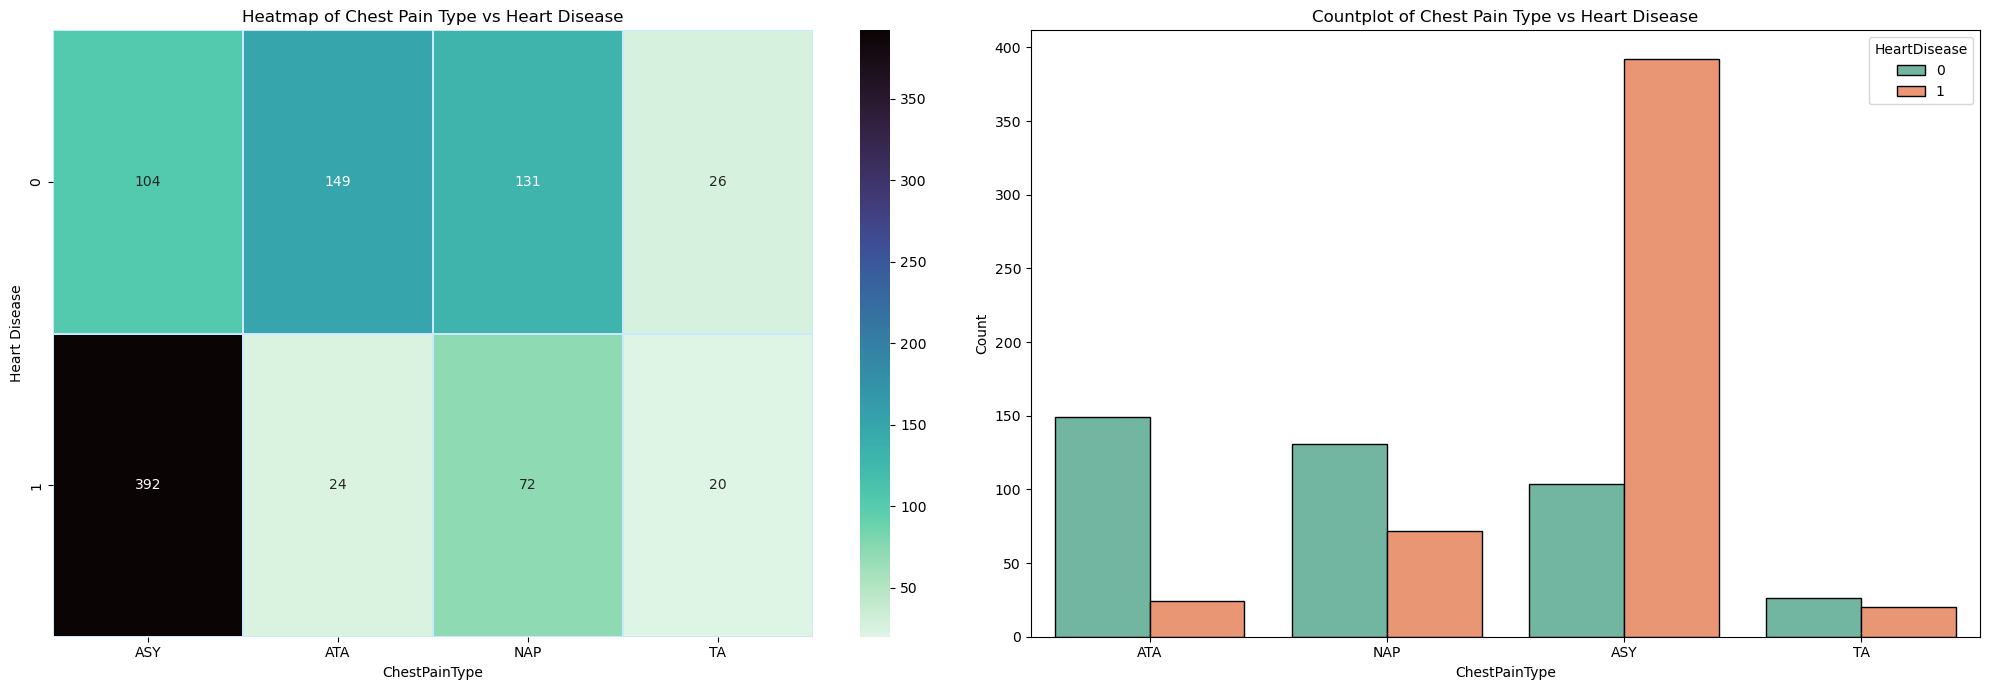

In [43]:
temp_df = pd.crosstab(df['HeartDisease'], df['ChestPainType'])

fig, ax = plt.subplots(1,2, figsize=(20,7))

ax[0] = sns.heatmap(data=temp_df,annot=True,fmt='0g', ax = ax[0],linewidths=0.01, cmap='mako_r', linecolor='#cae9ff')
ax[0].set(title='Heatmap of Chest Pain Type vs Heart Disease', ylabel='Heart Disease')

ax[1] = sns.countplot(data=df, x="ChestPainType", hue="HeartDisease", palette = 'Set2', ax=ax[1], edgecolor='black')
ax[1].set(title='Countplot of Chest Pain Type vs Heart Disease', ylabel='Count')

plt.tight_layout()
plt.show()

🔍 Conclusions:
* A significant proportion of people who have heart disease do not experience any chest pain symptoms. This type of chest pain is called Asymptomatic Chest Pain.
* The next largest group of people with heart disease experience Atypical Angina, which means they may have chest pain or discomfort that differs from the typical chest pain associated with heart disease.
* These findings suggest that heart disease can manifest without the presence of chest pain. It implies that not all cases of heart disease are accompanied by chest pains, and individuals may have heart disease without experiencing typical chest pain symptoms

# Analysis between Heart Disease and Exercise Angina:
### Can exercise cause heart disease?
#### What is Exercise Angina?
Exercise angina, also known as exertional angina or angina pectoris, refers to chest pain or discomfort that occurs during physical activity or exercise. It is a symptom typically associated with coronary artery disease, which is a condition where the arteries that supply blood to the heart become narrowed or blocked.

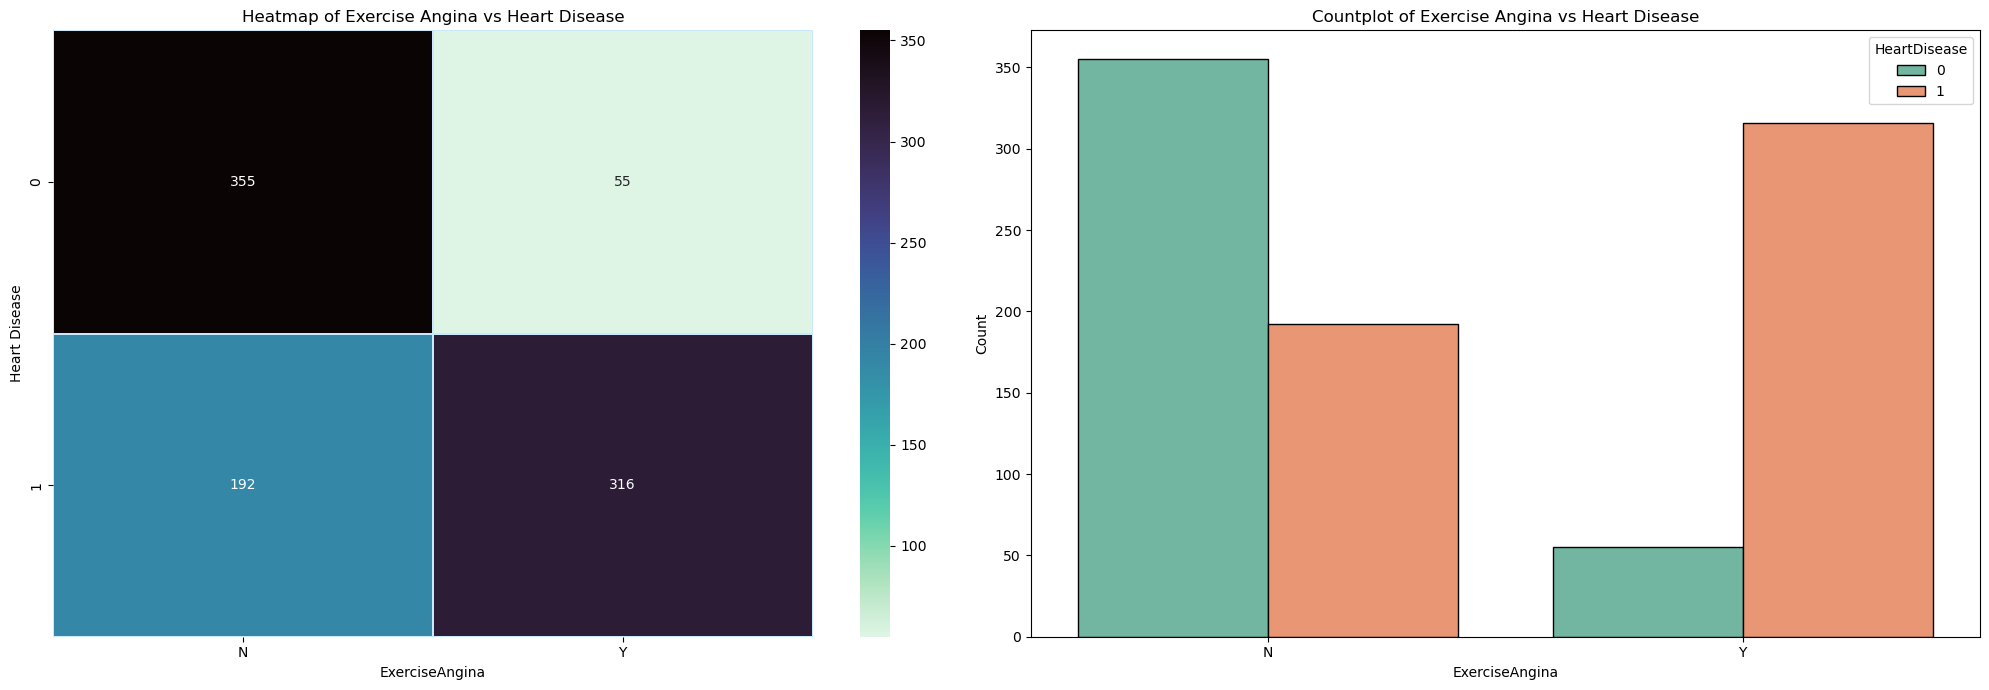

In [45]:
temp_df = pd.crosstab(df['HeartDisease'], df['ExerciseAngina'])

fig, ax = plt.subplots(1,2, figsize=(20,7))

ax[0] = sns.heatmap(data=temp_df,annot=True,fmt='0g', ax = ax[0],linewidths=0.01, cmap='mako_r', linecolor='#cae9ff')
ax[0].set(title='Heatmap of Exercise Angina vs Heart Disease', ylabel='Heart Disease')

ax[1] = sns.countplot(data=df, x="ExerciseAngina", hue="HeartDisease", palette = 'Set2', ax=ax[1], edgecolor='black')
ax[1].set(title='Countplot of Exercise Angina vs Heart Disease', ylabel='Count')

plt.tight_layout()
plt.show()

# Analysis between Heart Disease and Fasting Blood Sugar:
### How is Fasting Blood Sugar related to Heart Disease?
####  What is Fasting Blood Sugar?
Fasting blood sugar, also known as fasting blood glucose, refers to the level of glucose (sugar) in the bloodstream after an overnight fast. It is typically measured in milligrams per deciliter (mg/dL) or millimoles per liter (mmol/L).
Fasting blood sugar is an important parameter used in diagnosing and monitoring diabetes.
It provides information about the body's ability to regulate blood glucose levels in the absence of food intake.
Normally, when a person has fasted for at least 8 hours, the fasting blood sugar level should fall within a specific range.

#### Note
- In this dataset 0 means normal Fasting Blood Sugar level and 1 means Abnormal Blood Sugar level

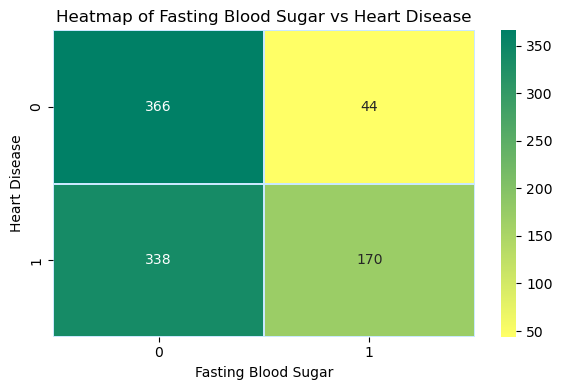

In [46]:
temp_df = pd.crosstab(df['HeartDisease'], df['FastingBS'])

fig, ax = plt.subplots(figsize= (6,4))

ax = sns.heatmap(data=temp_df,annot=True,fmt='0g', ax = ax,linewidths=0.01, cmap='summer_r', linecolor='#cae9ff')
ax.set(title='Heatmap of Fasting Blood Sugar vs Heart Disease', ylabel='Heart Disease', xlabel='Fasting Blood Sugar')
plt.tight_layout()
plt.show()

 Conclusions:
* Based on the heatmap analysis, it is evident that individuals with normal fasting blood sugar levels are also susceptible to heart disease. In fact, they exhibit a higher likelihood of developing heart disease compared to those with abnormal fasting blood sugar levels.
* This suggests that while fasting blood sugar levels can be a factor in the development or presence of heart disease, it is not the sole determining factor

# 3) **Data Preprocessing**

**Feature Scaling**

In [48]:
scaler = StandardScaler() # scaling in range [-1, 1]
standard_df = scaler.fit_transform(df[num_cols])
standard_df = pd.DataFrame(standard_df, columns=num_cols)
standard_df.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak
0,-1.433140,0.410909,0.825070,-0.551341,1.382928,-0.832432
1,-0.478484,1.491752,-0.171961,-0.551341,0.754157,0.105664
2,-1.751359,-0.129513,0.770188,-0.551341,-1.525138,-0.832432
3,-0.584556,0.302825,0.139040,-0.551341,-1.132156,0.574711
4,0.051881,0.951331,-0.034755,-0.551341,-0.581981,-0.832432


**Merged New Columns to Cetegorcal data**

In [49]:
df = standard_df.join(df[cate_cols+target])
df.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope,HeartDisease
0,-1.433140,0.410909,0.825070,-0.551341,1.382928,-0.832432,M,ATA,Normal,N,Up,0
1,-0.478484,1.491752,-0.171961,-0.551341,0.754157,0.105664,F,NAP,Normal,N,Flat,1
2,-1.751359,-0.129513,0.770188,-0.551341,-1.525138,-0.832432,M,ATA,ST,N,Up,0
3,-0.584556,0.302825,0.139040,-0.551341,-1.132156,0.574711,F,ASY,Normal,Y,Flat,1
4,0.051881,0.951331,-0.034755,-0.551341,-0.581981,-0.832432,M,NAP,Normal,N,Up,0


**Handling Categorical Variables**

**OneHotEncoder**

In [50]:
# enc = OrdinalEncoder()
# enc_data = enc.fit_transform(df[cate_cols])
# df[cate_cols] = enc_data
# df.head()

df = pd.get_dummies(df)
df.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,-1.433140,0.410909,0.825070,-0.551341,1.382928,-0.832432,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
1,-0.478484,1.491752,-0.171961,-0.551341,0.754157,0.105664,1,1,0,0,...,1,0,0,1,0,1,0,0,1,0
2,-1.751359,-0.129513,0.770188,-0.551341,-1.525138,-0.832432,0,0,1,0,...,0,0,0,0,1,1,0,0,0,1
3,-0.584556,0.302825,0.139040,-0.551341,-1.132156,0.574711,1,1,0,1,...,0,0,0,1,0,0,1,0,1,0
4,0.051881,0.951331,-0.034755,-0.551341,-0.581981,-0.832432,0,0,1,0,...,1,0,0,1,0,1,0,0,0,1


# **4) Building Models**

**Split data to 70% train data & 30% test data randomly (to build & evaluate Model)**

In [51]:
X = df.drop(target, axis=1)
y = df[target]
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

**Support Vector Classifier**

In [52]:
svc = SVC()
svc.fit(x_train,y_train)
y_pred = svc.predict(x_test)
acc_svc = accuracy_score(y_test, y_pred)
print( 'Accuracy score of SVM is', acc_svc) # 0.8659420289855072(OrdinalEncoder)

Accuracy score of SVM is 0.8840579710144928


**Confusion Matrix**

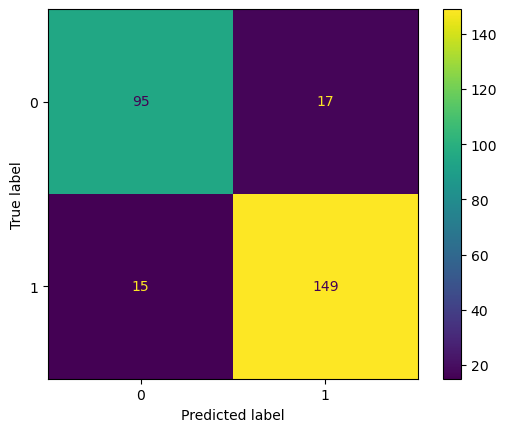

In [53]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

**K-Nearest Neighbors**

In [54]:
knn = KNN()
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)
acc_knn = accuracy_score(y_test, y_pred)
print( 'Accuracy score of KNN is', acc_knn) # 0.8586956521739131(OrdinalEncoder)

Accuracy score of KNN is 0.8840579710144928


**Confusion Matrix**

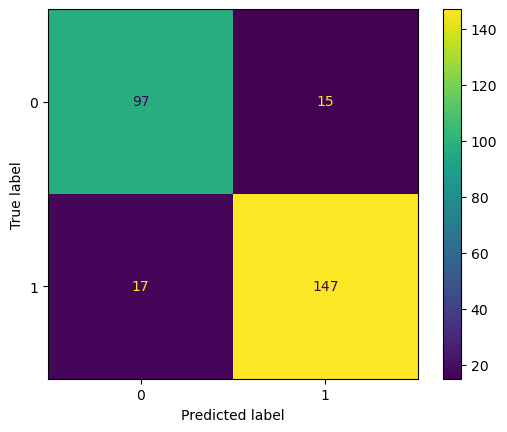

In [55]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

**Random Forest Classifier**

In [56]:
rf = RF()
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
acc_rf = accuracy_score(y_test, y_pred)
print( 'Accuracy score of Random Forest Classifier is', acc_rf) # 0.894927536231884(OrdinalEncoder)

Accuracy score of Random Forest Classifier is 0.8768115942028986


**Confusion Matrix**

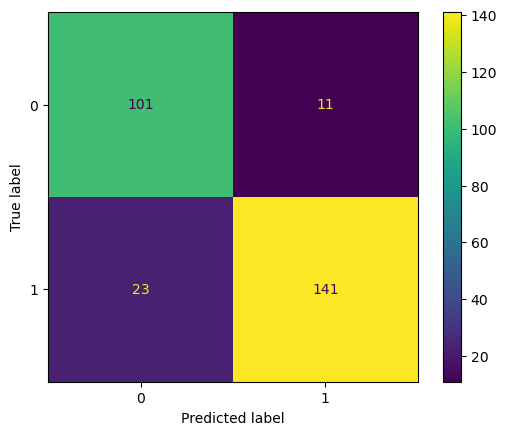

In [57]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

**Decision Tree Classifier**

In [58]:
dt = DT(max_depth = 4)
dt.fit(x_train,y_train)
y_pred = dt.predict(x_test)
acc_dt = accuracy_score(y_test, y_pred)
print( 'Accuracy score of Decision Tree Classifier is', acc_dt) # 0.8442028985507246(OrdinalEncoder)

Accuracy score of Decision Tree Classifier is 0.8369565217391305


**Confusion Matrix**

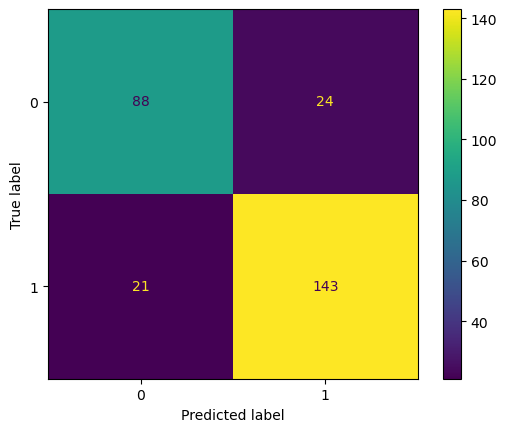

In [59]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

**Comparing Scores of Models**

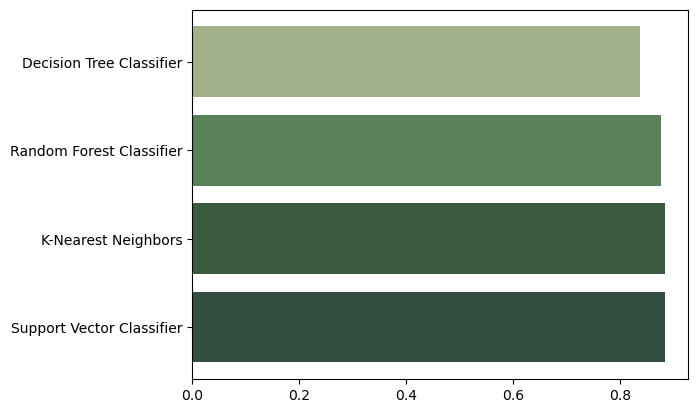

In [60]:
models = ["Support Vector Classifier", "K-Nearest Neighbors", "Random Forest Classifier", "Decision Tree Classifier"]
scores = [acc_svc, acc_knn, acc_rf, acc_dt]

plt.barh(models, scores, color=["#344e41","#3a5a40","#588157","#a3b18a"])
plt.show()